# Merging Positive and Negative Samples and Normalizing the Data

We will merge the positive and negative samples into a single dataset and normalize the features for consistent scaling. This ensures the data is ready for analysis or machine learning.



Download the CSV files here:
[Positive and Negative Samples](https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1zut7nFz_dJoHZiLcYi_fBrOEQLlWpxjJ%3Fusp%3Dsharing)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV files
positive_df = pd.read_csv('/content/processed_data.csv')
negative_df = pd.read_csv('/content/negative_samples_final.csv')

# Add the OvertakeHappened column
positive_df['OvertakeHappened'] = 1
negative_df['OvertakeHappened'] = 0

# Merge the two dataframes
merged_df = pd.concat([positive_df, negative_df], ignore_index=True)

# Drop the 'OvertakerDrsState' column
if 'OvertakerDrsState' in merged_df.columns:
    merged_df = merged_df.drop(columns=['OvertakerDrsState'])

# Take absolute value of 'SpeedDelta'
merged_df['SpeedDelta'] = merged_df['SpeedDelta'].abs()

scaler = StandardScaler()
columns_to_normalize = ['AverageCornerSpeed', 'DistanceDelta', 'SpeedDelta']

# Ensure the columns exist
for col in columns_to_normalize:
    if col not in merged_df.columns:
        raise ValueError(f"Column {col} not found in the data.")

merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])
merged_df.drop('AvoidTurn', axis=1, inplace=True)

# Save the result to a new CSV file
merged_df.to_csv('merged_normalized_data.csv', index=False)

print("Merging and processing complete! Output saved to 'merged_normalized_data.csv'.")


Merging and processing complete! Output saved to 'merged_normalized_data.csv'.


# Baseline Model for testing Ablation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV files
positive_df = pd.read_csv('/content/processed_data.csv')
negative_df = pd.read_csv('/content/negative_samples_final.csv')

# Add the OvertakeHappened column
positive_df['OvertakeHappened'] = 1
negative_df['OvertakeHappened'] = 0

# Merge the two dataframes
merged_df = pd.concat([positive_df, negative_df], ignore_index=True)

# Drop the 'OvertakerDrsState' column
if 'OvertakerDrsState' in merged_df.columns:
    merged_df = merged_df.drop(columns=['OvertakerDrsState'])

# Take absolute value of 'SpeedDelta'
merged_df['SpeedDelta'] = merged_df['SpeedDelta'].abs()

scaler = StandardScaler()
columns_to_normalize = ['AverageCornerSpeed', 'DistanceDelta', 'SpeedDelta']

# Ensure the columns exist
for col in columns_to_normalize:
    if col not in merged_df.columns:
        raise ValueError(f"Column {col} not found in the data.")

merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])
merged_df.drop('AvoidTurn', axis=1, inplace=True)

# Save the result to a new CSV file
merged_df.to_csv('merged_normalized_data.csv', index=False)

print("Merging and processing complete! Output saved to 'merged_normalized_data.csv'.")


Merging and processing complete! Output saved to 'merged_normalized_data.csv'.


# Removing SpeedDelta

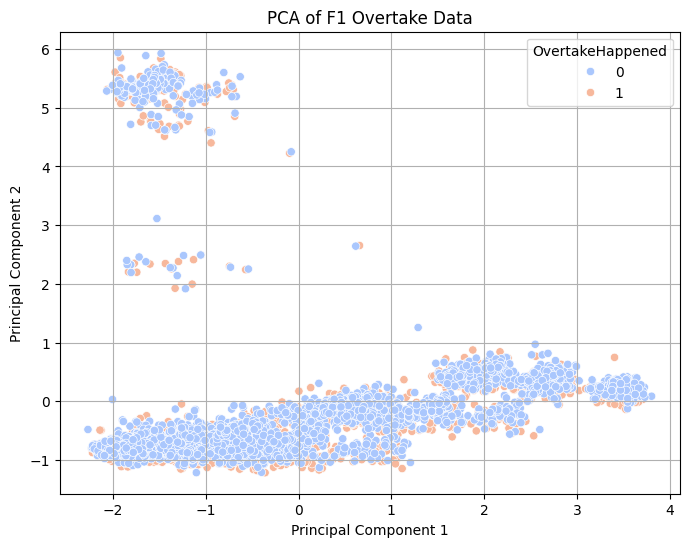

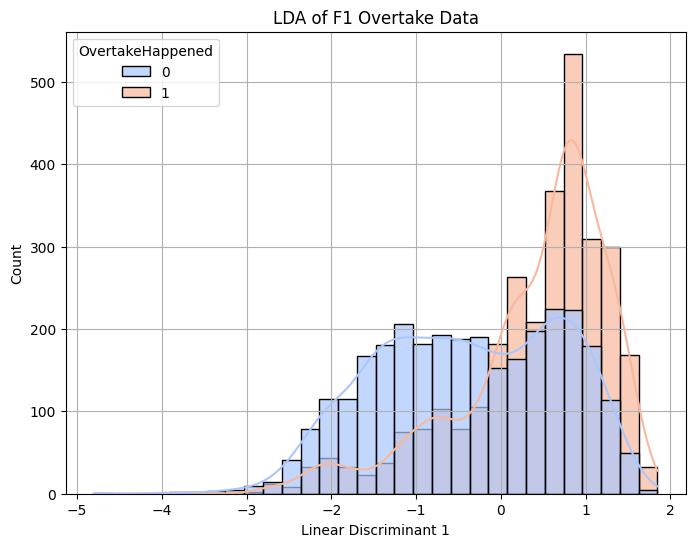

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


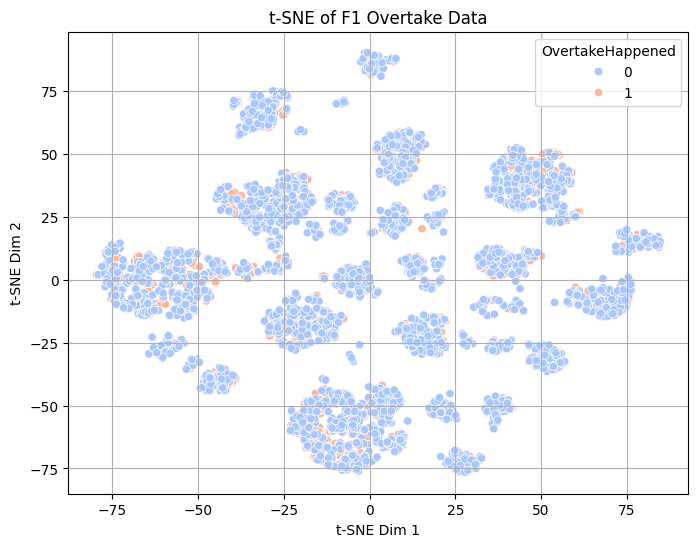

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Load your data
df = pd.read_csv('merged_normalized_data.csv')

# Drop categorical/string columns (or encode them if needed)
drop_cols = ['Race', 'Overtaker', 'Overtaken', 'Turn', 'Session', 'Lap', 'Position', 'Year', 'OvertakerNumber', 'OvertakenNumber', 'X', 'Y', 'SpeedDelta']

df = df.drop(columns=drop_cols)


# Fill NaNs
df = df.fillna(0)

# Separate features and target
y = df['OvertakeHappened']
X = df.drop(columns=['OvertakeHappened'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================
# PCA
# ==========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm')
plt.title('PCA of F1 Overtake Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# ==========================
# LDA
# ==========================
lda = LDA(n_components=1)  # For binary classification
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8,6))
sns.histplot(x=X_lda[:,0], hue=y, bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title('LDA of F1 Overtake Data')
plt.xlabel('Linear Discriminant 1')
plt.grid(True)
plt.show()

# ==========================
# t-SNE
# ==========================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='coolwarm')
plt.title('t-SNE of F1 Overtake Data')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       600
           1       0.79      0.81      0.80       599

    accuracy                           0.79      1199
   macro avg       0.79      0.79      0.79      1199
weighted avg       0.79      0.79      0.79      1199



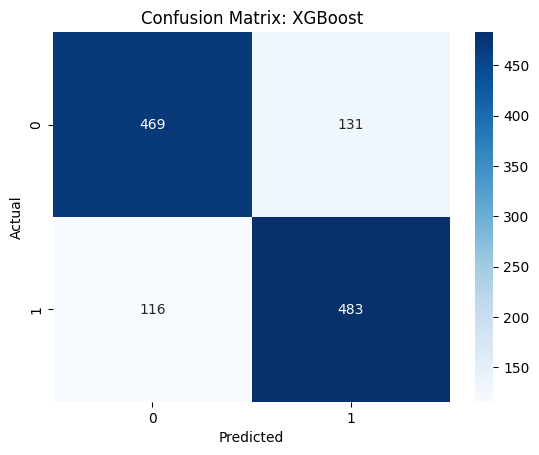

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("merged_normalized_data.csv")

# Drop non-numeric or irrelevant columns
drop_cols = ['Race', 'Overtaker', 'Overtaken', 'Turn', 'Session', 'Lap', 'Position', 'Year', 'OvertakerNumber', 'OvertakenNumber', 'X', 'Y', 'SpeedDelta']

df = df.drop(columns=drop_cols)

# Drop NaNs
df = df.dropna()

# Split features and target
X = df.drop("OvertakeHappened", axis=1)
y = df["OvertakeHappened"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all models
evaluate_model("XGBoost", y_test, y_pred_xgb)


# Removing CornerAngle

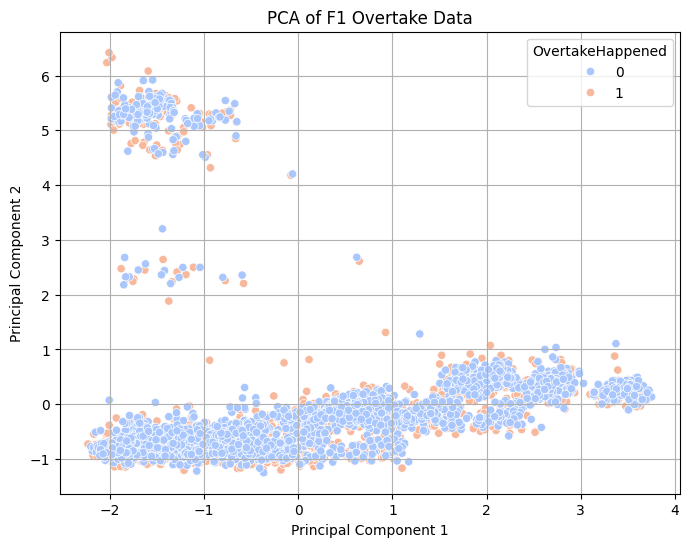

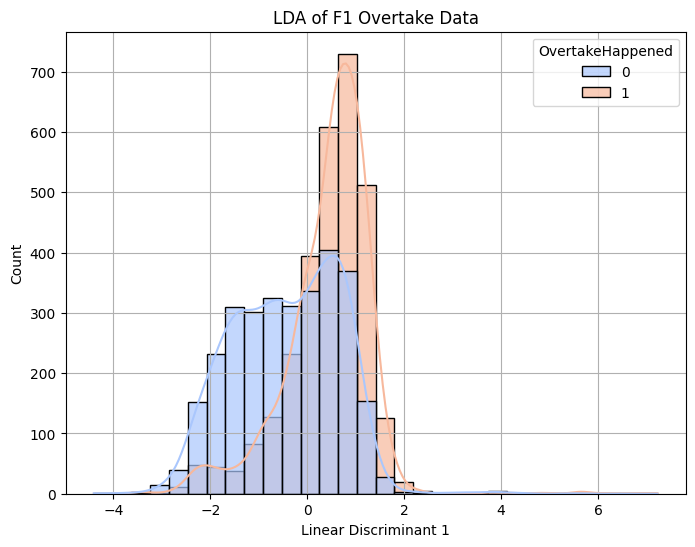

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


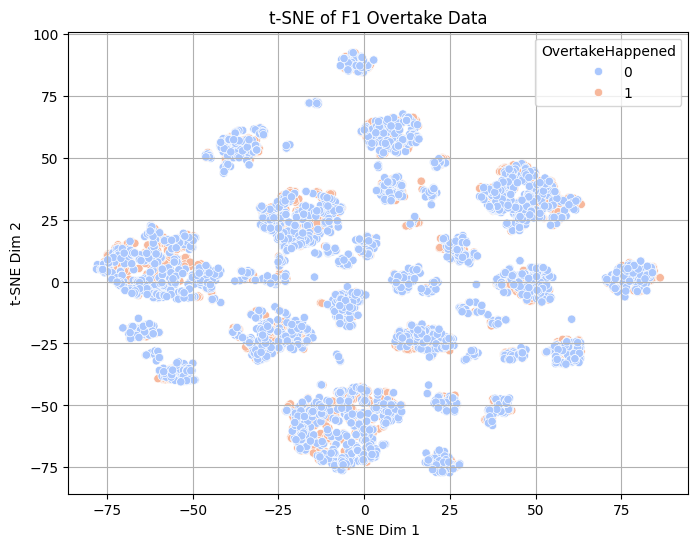

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Load your data
df = pd.read_csv('merged_normalized_data.csv')

# Drop categorical/string columns (or encode them if needed)
drop_cols = ['Race', 'Overtaker', 'Overtaken', 'Turn', 'Session', 'Lap', 'Position', 'Year', 'OvertakerNumber', 'OvertakenNumber', 'X', 'Y', 'CornerAngle']

df = df.drop(columns=drop_cols)


# Fill NaNs
df = df.fillna(0)

# Separate features and target
y = df['OvertakeHappened']
X = df.drop(columns=['OvertakeHappened'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================
# PCA
# ==========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm')
plt.title('PCA of F1 Overtake Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# ==========================
# LDA
# ==========================
lda = LDA(n_components=1)  # For binary classification
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8,6))
sns.histplot(x=X_lda[:,0], hue=y, bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title('LDA of F1 Overtake Data')
plt.xlabel('Linear Discriminant 1')
plt.grid(True)
plt.show()

# ==========================
# t-SNE
# ==========================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='coolwarm')
plt.title('t-SNE of F1 Overtake Data')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:34:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       600
           1       0.73      0.80      0.77       599

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199



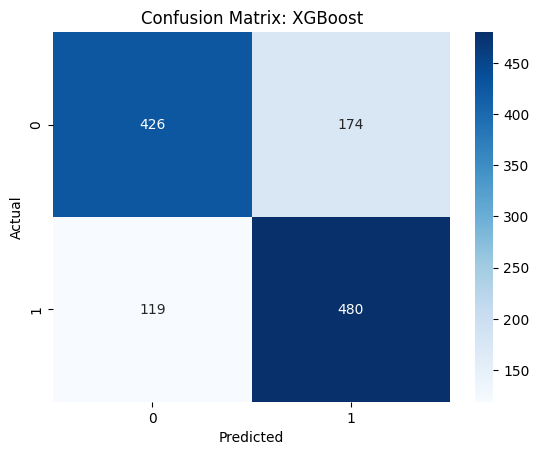

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("merged_normalized_data.csv")

# Drop non-numeric or irrelevant columns
drop_cols = ['Race', 'Overtaker', 'Overtaken', 'Turn', 'Session', 'Lap', 'Position', 'Year', 'OvertakerNumber', 'OvertakenNumber', 'X', 'Y', 'CornerAngle']

df = df.drop(columns=drop_cols)

# Drop NaNs
df = df.dropna()

# Split features and target
X = df.drop("OvertakeHappened", axis=1)
y = df["OvertakeHappened"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all models
evaluate_model("XGBoost", y_test, y_pred_xgb)


# Removing AverageCornerSpeed

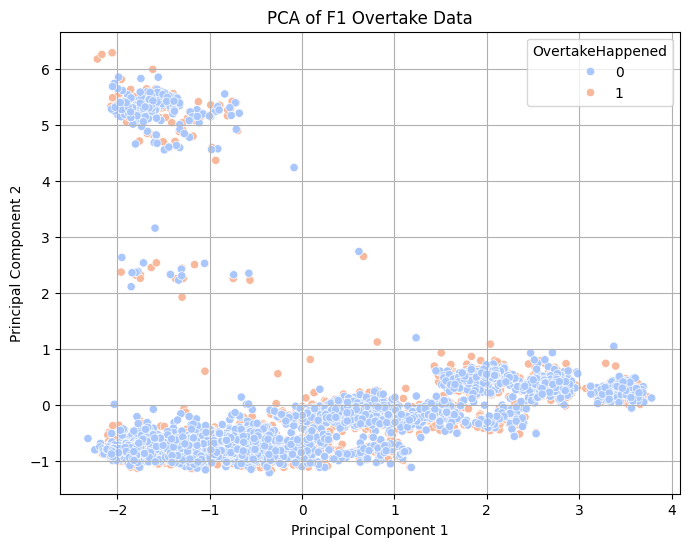

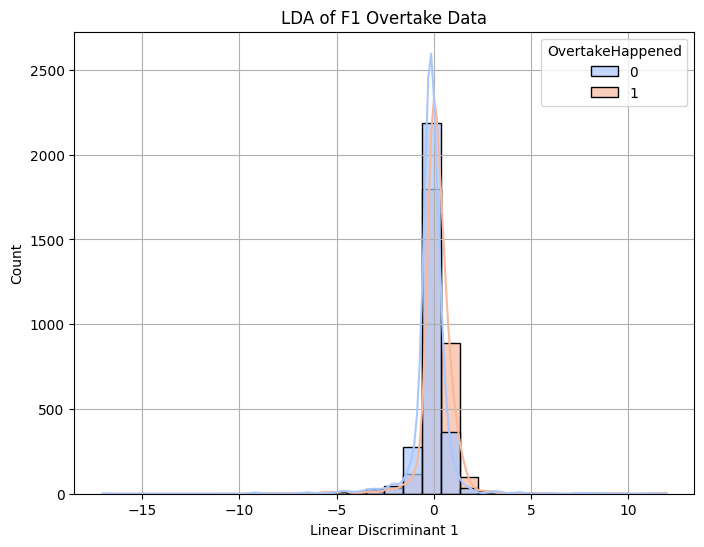

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


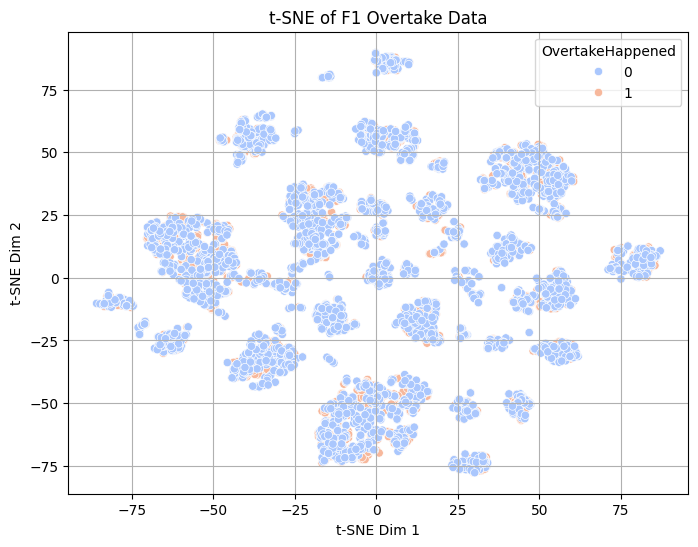

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Load your data
df = pd.read_csv('merged_normalized_data.csv')

# Drop categorical/string columns (or encode them if needed)
drop_cols = ['Race', 'Overtaker', 'Overtaken', 'Turn', 'Session', 'Lap', 'Position', 'Year', 'OvertakerNumber', 'OvertakenNumber', 'X', 'Y', 'AverageCornerSpeed']

df = df.drop(columns=drop_cols)


# Fill NaNs
df = df.fillna(0)

# Separate features and target
y = df['OvertakeHappened']
X = df.drop(columns=['OvertakeHappened'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================
# PCA
# ==========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm')
plt.title('PCA of F1 Overtake Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# ==========================
# LDA
# ==========================
lda = LDA(n_components=1)  # For binary classification
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8,6))
sns.histplot(x=X_lda[:,0], hue=y, bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title('LDA of F1 Overtake Data')
plt.xlabel('Linear Discriminant 1')
plt.grid(True)
plt.show()

# ==========================
# t-SNE
# ==========================
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='coolwarm')
plt.title('t-SNE of F1 Overtake Data')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid(True)
plt.show()


In [ ]:
print(df.columns)

Index(['NormalizedPosition', 'CornerAngle', 'SpeedDelta', 'DistanceDelta',
       'isOvertakerSoft', 'isOvertakenSoft', 'isOvertakerMedium',
       'isOvertakenMedium', 'isOvertakerHard', 'isOvertakenHard',
       'isOvertakerWet', 'isOvertakenWet', 'isOvertakerIntermediate',
       'isOvertakenIntermediate', 'OvertakerTyreLife', 'OvertakenTyreLife',
       'IsOvertakerFreshTyre', 'IsOvertakenFreshTyre', 'OvertakeHappened'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:06:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       600
           1       0.77      0.77      0.77       599

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199



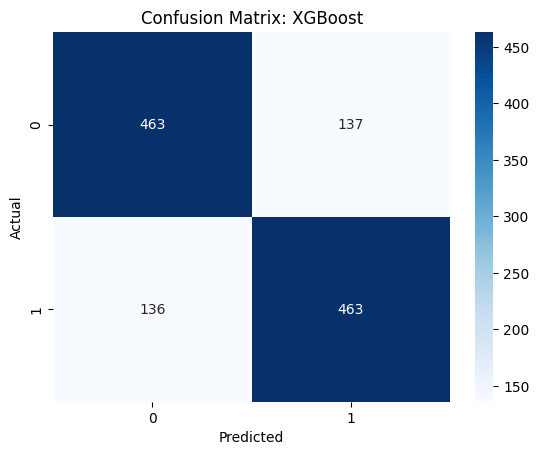

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("merged_normalized_data.csv")

# Drop non-numeric or irrelevant columns
drop_cols = ['Race', 'Overtaker', 'Overtaken', 'Turn', 'Session', 'Lap', 'Position', 'Year', 'OvertakerNumber', 'OvertakenNumber', 'X', 'Y', 'AverageCornerSpeed']

df = df.drop(columns=drop_cols)

# Drop NaNs
df = df.dropna()

# Split features and target
X = df.drop("OvertakeHappened", axis=1)
y = df["OvertakeHappened"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 2. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate the model
evaluate_model("XGBoost", y_test, y_pred_xgb)
